# import

In [2]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

In [3]:
N_var = 8

# Построение портрета математического маятника

## Cистем дифф. ур. мат.  маятника
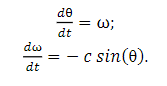

In [4]:
def ode(y, t, c): 
    theta, omega = y 
    dydt = [omega, - c*np.sin(theta)] 
    return dydt

## Моделирование дфф. ур.

In [5]:
def calcODE(args, y0, dy0, ts = 10, nt = 101): 
    y0 = [y0, dy0] 
    t = np.linspace(0, ts, nt) 
    sol = odeint(ode, y0, t, args) 
    return sol

### Построение  фазового  портрета 

In [6]:
def drawPhasePortrait(
        args, 
        deltaX = 1, 
        deltaDX = 1, 
        startX = 0,  
        stopX = 5, 
        startDX = 0, 
        stopDX = 5, 
        ts = 10, 
        nt = 101
    ): 
    for y0 in range(startX, stopX, deltaX): 
            for dy0 in range(startDX, stopDX, deltaDX): 
                sol = calcODE(args, y0, dy0, ts, nt) 
                plt.plot(sol[:, 0], sol[:, 1], 'b') 
    plt.xlabel('x') 
    plt.ylabel('dx/dt') 
    plt.grid() 
    plt.show()

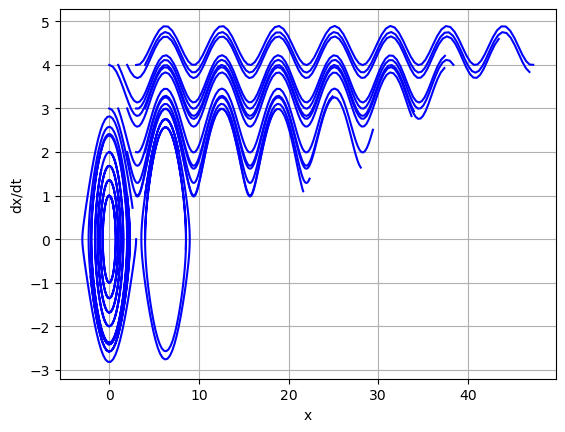

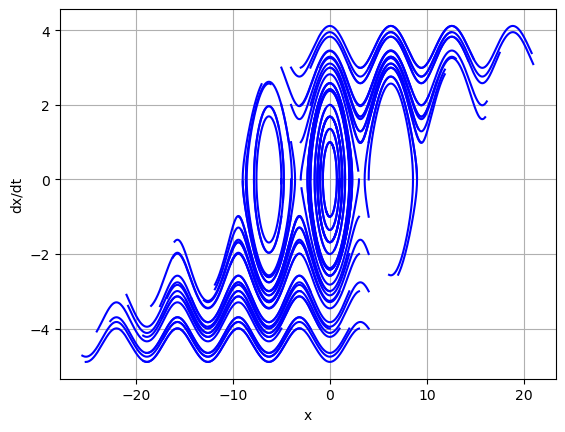

In [7]:
c = 2 # Параметр ОДУ (длина маятника)  
args=(c, ) 
drawPhasePortrait(args) 
drawPhasePortrait(args,  1,  1,  -5,  5,  -4,  4,  ts  =  5,  nt  = 
301)

## Cистем дифф. ур. мат. маятника с трением
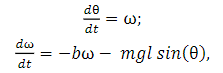

In [8]:
m = 0.2 * N_var 
l= 5 / N_var
b = 0.1 + 0.015 * N_var

In [9]:
def ode(Y, t, b): 
    theta, omega = Y
    dydt = [-b*omega, - m*10*l*np.sin(theta)] 
    return dydt

### Построение  фазового  портрета 

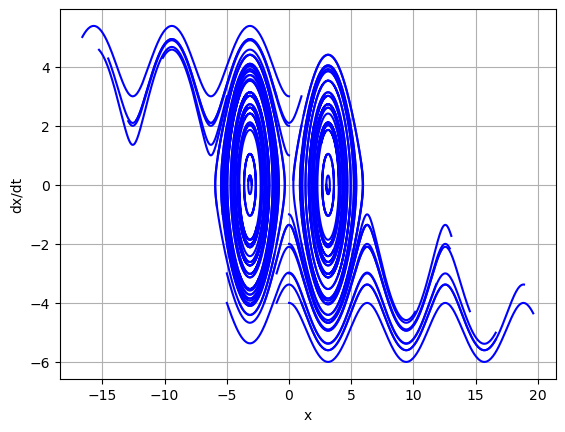

In [15]:
drawPhasePortrait(args, 1, 1, -5, 5, -4, 4, ts = 2, nt = 301) 

# Построение фазового  портрета  системы
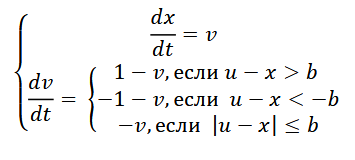

In [ ]:
b = 0.2*N_var+0.2
u = 1

In [ ]:
def ode(Y, t, b): 
    v, x = Y
    dxdt = [v, 
            (1-v)*((u-x)>b) +\
            (-1-v)*((u-x)<-b) +\
            (-v)*((u-x)<=b)
            ] 
    return dxdt